# Figuring Out Which Employees May Quit

In [62]:
import pandas as pd
import numpy as np


### Load hr data

In [63]:
hr_df = pd.read_csv(r"/content/hr_data.csv")

#shape of df
hr_df.shape

(14999, 9)

In [64]:
# head of df
hr_df.head(3)

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,1003,2,157,3,0,1,0,sales,low
1,1005,5,262,6,0,1,0,sales,medium
2,1486,7,272,4,0,1,0,sales,medium


In [65]:
# bottom of df
hr_df.tail(3)

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
14996,87679,2,143,3,0,1,0,support,low
14997,87681,6,280,4,0,1,0,support,low
14998,87684,2,158,3,0,1,0,support,low


In [66]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   employee_id            14999 non-null  int64 
 1   number_project         14999 non-null  int64 
 2   average_montly_hours   14999 non-null  int64 
 3   time_spend_company     14999 non-null  int64 
 4   Work_accident          14999 non-null  int64 
 5   left                   14999 non-null  int64 
 6   promotion_last_5years  14999 non-null  int64 
 7   department             14999 non-null  object
 8   salary                 14999 non-null  object
dtypes: int64(7), object(2)
memory usage: 1.0+ MB


In [67]:
# Categorical columns
hr_df.select_dtypes(exclude=['int', 'float']).columns

Index(['department', 'salary'], dtype='object')

In [68]:
# Display values in categorical columns
print(hr_df['department'].unique())
print(hr_df['salary'].unique())

['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
['low' 'medium' 'high']


### Load employee satisfaction data

In [69]:
emp_satis_eval = pd.read_excel(r"/content/employee_satisfaction_evaluation.xlsx")

emp_satis_eval.head()

,EMPLOYEE #,satisfaction_level,last_evaluation
0,1003,0.38,0.53
1,1005,0.80,0.86
2,1486,0.11,0.88
3,1038,0.72,0.87
4,1057,0.37,0.52


In [70]:
#shape
emp_satis_eval.shape

(14999, 3)

### Join Tables

In [71]:
main_df = hr_df.set_index('employee_id').join(emp_satis_eval.set_index('EMPLOYEE #'))
main_df = main_df.reset_index()
main_df.head(3)

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88


### Boxplot

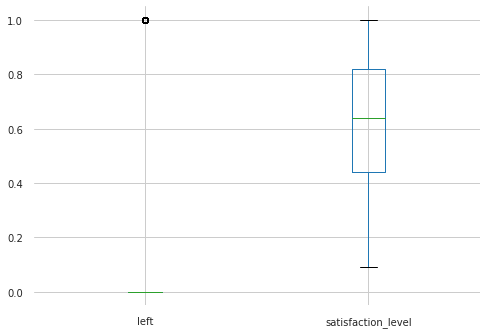

In [74]:
## status vs satisfaction

main_df.boxplot(column = ['left','satisfaction_level'])

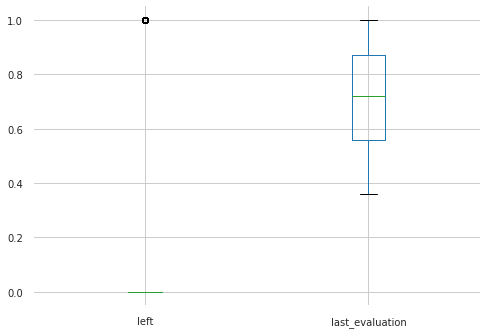

In [76]:
## status vs last_evaluation
main_df.boxplot(column = ['left','last_evaluation'])

### Scatterplot

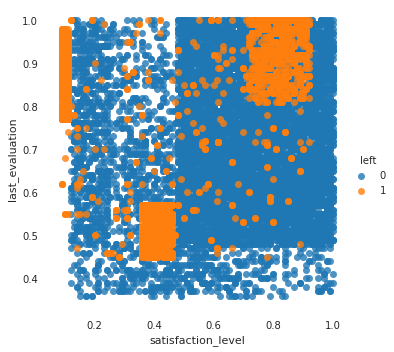

In [52]:
import seaborn as sns
# Scatterplot of satisfaction vs. last_evaluation
sns.lmplot(x='satisfaction_level', y='last_evaluation', hue='left', data=main_df, fit_reg=False)

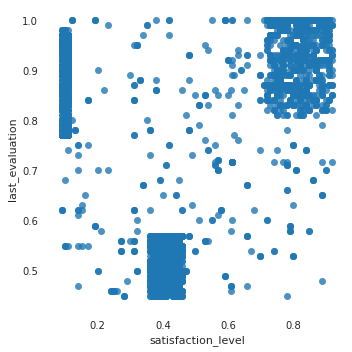

In [55]:
# Scatterplot of satisfaction vs. last_evaluation, only those who have left
sns.lmplot(x='satisfaction_level', y='last_evaluation', data=main_df[main_df.left == 1], fit_reg=False)

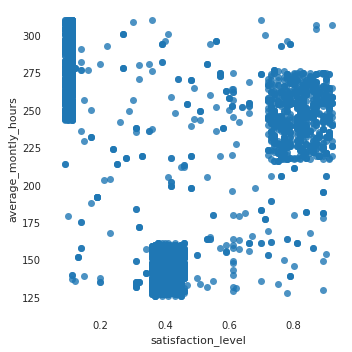

In [54]:
# Scatterplot of satisfaction vs. avg_monthly_hrs, only those who have left
sns.lmplot(x='satisfaction_level', y='average_montly_hours', data=main_df[main_df.left == 1], fit_reg=False)

#### Pandas profiling

In [14]:
import pandas_profiling
from pandas_profiling import ProfileReport
ProfileReport(main_df)

### Checking missing values

In [15]:
main_df.isnull().sum()

employee_id               0
number_project            0
average_montly_hours      0
time_spend_company        0
Work_accident             0
left                      0
promotion_last_5years     0
department                0
salary                    0
satisfaction_level       27
last_evaluation          27
dtype: int64

### Fill the missing blanks with the aveage values

In [16]:
main_df.describe()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14972.000000,14972.000000
mean,45424.627575,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,0.612830,0.716125
std,25915.900127,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.248714,0.171138
min,1003.000000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.090000,0.360000
25%,22872.500000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.440000,0.560000
50%,45448.000000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,0.640000,0.720000
75%,67480.500000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,0.820000,0.870000
max,99815.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
main_df.fillna(main_df.mean(), inplace=True)
main_df.head(3)

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88


In [18]:
main_df.isnull().sum()

employee_id              0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
satisfaction_level       0
last_evaluation          0
dtype: int64

In [19]:
# Removing employee ID
main_df_final = main_df.drop(['employee_id'], axis=1)
main_df_final.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,2,157,3,0,1,0,sales,low,0.38,0.53
1,5,262,6,0,1,0,sales,medium,0.80,0.86
2,7,272,4,0,1,0,sales,medium,0.11,0.88
3,5,223,5,0,1,0,sales,low,0.72,0.87
4,2,159,3,0,1,0,sales,low,0.37,0.52


### Displaying Correlation Matrix

No handles with labels found to put in legend.


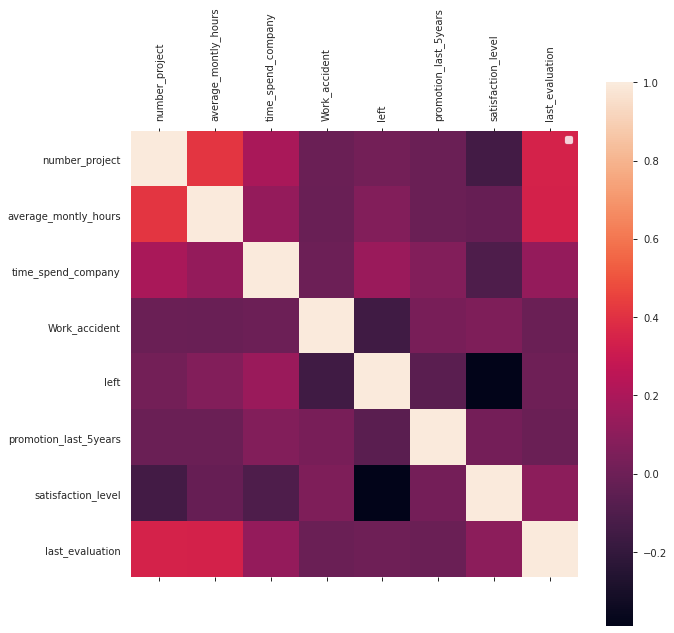

In [20]:
import matplotlib.pyplot as plt

def plot_corr(df,size=10):

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.legend()
    cax = ax.matshow(corr)
    fig.colorbar(cax)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.show()
    
plot_corr(main_df_final)

## Preparing  Dataset for ML

In [21]:
#One Hot Encoding on Categorical Data

categorial = ['department','salary']
main_df_final = pd.get_dummies(main_df_final, columns=categorial, drop_first=True)
main_df_final.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,2,157,3,0,1,0,0.38,0.53,0,0,0,0,0,0,1,0,0,1,0
1,5,262,6,0,1,0,0.80,0.86,0,0,0,0,0,0,1,0,0,0,1
2,7,272,4,0,1,0,0.11,0.88,0,0,0,0,0,0,1,0,0,0,1
3,5,223,5,0,1,0,0.72,0.87,0,0,0,0,0,0,1,0,0,1,0
4,2,159,3,0,1,0,0.37,0.52,0,0,0,0,0,0,1,0,0,1,0


In [22]:
#Shape of main_df_final df
main_df_final.shape

(14999, 19)

In [23]:
# count in class
main_df_final.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [24]:
main_df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   number_project          14999 non-null  int64  
 1   average_montly_hours    14999 non-null  int64  
 2   time_spend_company      14999 non-null  int64  
 3   Work_accident           14999 non-null  int64  
 4   left                    14999 non-null  int64  
 5   promotion_last_5years   14999 non-null  int64  
 6   satisfaction_level      14999 non-null  float64
 7   last_evaluation         14999 non-null  float64
 8   department_RandD        14999 non-null  uint8  
 9   department_accounting   14999 non-null  uint8  
 10  department_hr           14999 non-null  uint8  
 11  department_management   14999 non-null  uint8  
 12  department_marketing    14999 non-null  uint8  
 13  department_product_mng  14999 non-null  uint8  
 14  department_sales        14999 non-null

In [25]:
from sklearn.model_selection import train_test_split

X = main_df_final.drop(['left'],axis=1).values
y = main_df_final['left'].values


In [26]:
# Split data into a 70:30 Ratio Train:Test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [27]:
# Normalize the data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [28]:
df_train = pd.DataFrame(X_train)
df_train.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.986003,1.001354,1.018450,-0.410333,-0.14765,0.430474,0.847718,-0.237816,-0.231718,-0.230575,-0.209394,-0.246848,-0.252658,1.613750,-0.41838,-0.466733,1.027328,-0.868795
1,1.799586,0.921497,0.338469,-0.410333,-0.14765,-2.032620,0.322564,-0.237816,-0.231718,-0.230575,-0.209394,-0.246848,-0.252658,-0.619675,-0.41838,2.142550,-0.973399,1.151019
2,-0.641165,-0.715582,-0.341513,2.437046,-0.14765,-0.821262,-0.202590,-0.237816,-0.231718,-0.230575,-0.209394,-0.246848,3.957914,-0.619675,-0.41838,-0.466733,-0.973399,1.151019


In [29]:
df_train.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
count,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04
mean,7.123023e-17,1.509624e-16,-3.955467e-16,3.133559e-16,-9.459208e-16,2.895048e-14,2.395323e-14,3.542848e-16,6.919992e-17,-4.001043e-16,5.609169e-16,6.770362e-17,-5.352842e-16,7.602051e-16,4.677551e-16,-4.824008e-16,1.145859e-16,-1.169335e-16
std,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00
min,-1.454749e+00,-2.093124e+00,-1.021494e+00,-4.103328e-01,-1.476499e-01,-2.113378e+00,-2.069803e+00,-2.378157e-01,-2.317181e-01,-2.305750e-01,-2.093936e-01,-2.468475e-01,-2.526584e-01,-6.196748e-01,-4.183802e-01,-4.667335e-01,-9.733987e-01,-8.687953e-01
25%,-6.411651e-01,-9.152256e-01,-3.415127e-01,-4.103328e-01,-1.476499e-01,-7.001265e-01,-9.027948e-01,-2.378157e-01,-2.317181e-01,-2.305750e-01,-2.093936e-01,-2.468475e-01,-2.526584e-01,-6.196748e-01,-4.183802e-01,-4.667335e-01,-9.733987e-01,-8.687953e-01
50%,1.724187e-01,-3.679309e-02,-3.415127e-01,-4.103328e-01,-1.476499e-01,1.074455e-01,3.081182e-02,-2.378157e-01,-2.317181e-01,-2.305750e-01,-2.093936e-01,-2.468475e-01,-2.526584e-01,-6.196748e-01,-4.183802e-01,-4.667335e-01,-9.733987e-01,-8.687953e-01
75%,9.860025e-01,8.815681e-01,3.384687e-01,-4.103328e-01,-1.476499e-01,8.342603e-01,9.060680e-01,-2.378157e-01,-2.317181e-01,-2.305750e-01,-2.093936e-01,-2.468475e-01,-2.526584e-01,1.613750e+00,-4.183802e-01,-4.667335e-01,1.027328e+00,1.151019e+00
max,2.613170e+00,2.179252e+00,4.418357e+00,2.437046e+00,6.772779e+00,1.561075e+00,1.664623e+00,4.204937e+00,4.315588e+00,4.336984e+00,4.775694e+00,4.051083e+00,3.957914e+00,1.613750e+00,2.390171e+00,2.142550e+00,1.027328e+00,1.151019e+00


## MAchine Learning

### Logistic Regression Model

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)

predictions = model.predict(X_test)

print("Accuracy {0:.2f}%".format(100*accuracy_score(predictions, y_test)))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy 79.33%
[[3177  245]
 [ 685  393]]
              precision    recall  f1-score   support

           0       0.82      0.93      0.87      3422
           1       0.62      0.36      0.46      1078

    accuracy                           0.79      4500
   macro avg       0.72      0.65      0.67      4500
weighted avg       0.77      0.79      0.77      4500



# Test your model on a single new row of data

In [31]:
# Create Test Input 
# Enter your values here

input_data = {'number_project': [3],
              'average_montly_hours': [160],
              'time_spend_company': [5],
              'Work_accident': [0],
              'promotion_last_5years': [1],
              'last_evaluation': [0.5],
              'satisfaction_level': [0.5],
              'department_RandD': [0],
              'department_accounting': [0],
              'department_hr': [0],
              'department_management': [0],
              'department_marketing': [1],
              'department_product_mng': [0],
              'department_sales': [0],
              'department_support': [0],
              'department_technical': [0],
              'salary_low': [0],
              'salary_medium': [1]}

# Convert to pandas dataframe
input_data = pd.DataFrame(input_data)

# Transform data using sc.transform
input_data = sc.transform(input_data)

# Reshape data for input into our model predict function
input_data = input_data.reshape(1, -1)

# Run prediction for our test sameple, 0 means employee will not leave, 1 means they are likely to leave/resign
model.predict(input_data)

# print probabilities of belonging to either class
model.predict_proba(input_data)

array([[0.88345377, 0.11654623]])

### Random Forest Classifer

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

model = RandomForestClassifier()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
score = model.score(X_test, y_test)

print("Accuracy {0:.2f}%".format(100*accuracy_score(predictions, y_test)))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy 99.00%
[[3415    7]
 [  38 1040]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3422
           1       0.99      0.96      0.98      1078

    accuracy                           0.99      4500
   macro avg       0.99      0.98      0.99      4500
weighted avg       0.99      0.99      0.99      4500



#### Features important with RF

In [33]:
main_df_final.drop(['left'],axis=1).columns

Index(['number_project', 'average_montly_hours', 'time_spend_company',
       'Work_accident', 'promotion_last_5years', 'satisfaction_level',
       'last_evaluation', 'department_RandD', 'department_accounting',
       'department_hr', 'department_management', 'department_marketing',
       'department_product_mng', 'department_sales', 'department_support',
       'department_technical', 'salary_low', 'salary_medium'],
      dtype='object')

In [34]:
import pandas as pd
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = pd.DataFrame(X_train).columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

feature_importances.head()

,importance
5,0.310930
2,0.192368
0,0.180183
1,0.146760
6,0.126834


## Deep Learning

In [35]:
# Use the newest version of TensorFlow 2.0
%tensorflow_version 2.x 

In [36]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(9, kernel_initializer = "uniform", activation = "relu", input_dim=18))
model.add(Dense(1, kernel_initializer = "uniform", activation = "sigmoid"))

model.compile(optimizer= "adam",loss = "binary_crossentropy",metrics = ["accuracy"])

In [37]:
# Summary and Parameters of model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 9)                 171       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 10        
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


In [38]:
# Start Training Our Classifier 
batch_size = 10
epochs = 25

history = model.fit(X_train,
                    y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/25
1050/1050 [==============================] - 2s 2ms/step - loss: 0.4099 - accuracy: 0.8303 - val_loss: 0.2661 - val_accuracy: 0.9116
Epoch 2/25
1050/1050 [==============================] - 2s 2ms/step - loss: 0.2234 - accuracy: 0.9302 - val_loss: 0.1956 - val_accuracy: 0.9424
Epoch 3/25
1050/1050 [==============================] - 1s 1ms/step - loss: 0.1833 - accuracy: 0.9448 - val_loss: 0.1762 - val_accuracy: 0.9504
Epoch 4/25
1050/1050 [==============================] - 2s 1ms/step - loss: 0.1706 - accuracy: 0.9496 - val_loss: 0.1697 - val_accuracy: 0.9500
Epoch 5/25
1050/1050 [==============================] - 2s 1ms/step - loss: 0.1659 - accuracy: 0.9507 - val_loss: 0.1664 - val_accuracy: 0.9522
Epoch 6/25
1050/1050 [==============================] - 1s 1ms/step - loss: 0.1625 - accuracy: 0.9516 - val_loss: 0.1643 - val_accuracy: 0.9511
Epoch 7/25
1050/1050 [==============================] - 1s 1ms/step - loss: 0.1607 - accuracy: 0.9519 - val_loss: 0.1638 - val_accuracy:

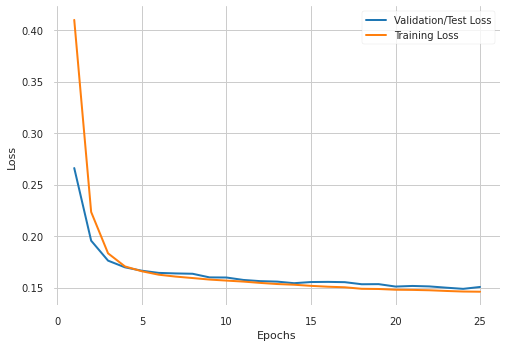

In [39]:
# Plotting our loss charts
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

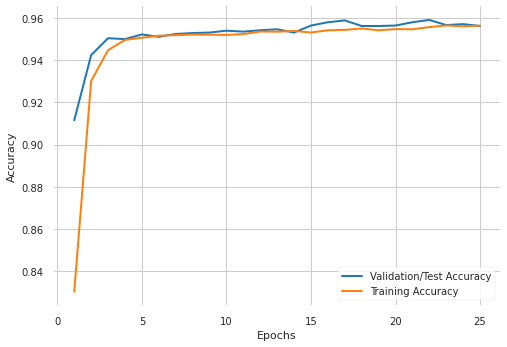

In [40]:
# Plotting our accuracy charts
import matplotlib.pyplot as plt

history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

### Classification Report and Confusion Matrix

In [41]:
predictions = model.predict(X_test)
predictions = (predictions > 0.5)

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[3341   81]
 [ 116  962]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      3422
           1       0.92      0.89      0.91      1078

    accuracy                           0.96      4500
   macro avg       0.94      0.93      0.94      4500
weighted avg       0.96      0.96      0.96      4500



## Deeper Model

In [46]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout

model2 = Sequential()

# Hidden Layer 1
model2.add(Dense(270, activation='relu', input_dim=18, kernel_regularizer=l2(0.01)))
model2.add(Dropout(0.25, noise_shape=None, seed=None))

# Hidden Layer 1
model2.add(Dense(180, activation='relu', input_dim=18, kernel_regularizer=l2(0.01)))
model2.add(Dropout(0.25, noise_shape=None, seed=None))

# Hidden Layer 2
model2.add(Dense(90, activation = 'relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.25, noise_shape=None, seed=None))

model2.add(Dense(1, activation='sigmoid'))

model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 270)               5130      
_________________________________________________________________
dropout_3 (Dropout)          (None, 270)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 180)               48780     
_________________________________________________________________
dropout_4 (Dropout)          (None, 180)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 90)                16290     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 91        
Total params: 70,291
Trainable params: 70,291
Non-trainable params: 0
__________________________________________________

In [47]:
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [48]:
# training of model
batch_size = 10
epochs = 25

history = model2.fit(X_train,
                    y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/25
1050/1050 [==============================] - 3s 3ms/step - loss: 0.6358 - accuracy: 0.9080 - val_loss: 0.2737 - val_accuracy: 0.9416
Epoch 2/25
1050/1050 [==============================] - 3s 3ms/step - loss: 0.2739 - accuracy: 0.9389 - val_loss: 0.2457 - val_accuracy: 0.9498
Epoch 3/25
1050/1050 [==============================] - 3s 3ms/step - loss: 0.2553 - accuracy: 0.9419 - val_loss: 0.2431 - val_accuracy: 0.9482
Epoch 4/25
1050/1050 [==============================] - 4s 4ms/step - loss: 0.2485 - accuracy: 0.9423 - val_loss: 0.2424 - val_accuracy: 0.9471
Epoch 5/25
1050/1050 [==============================] - 3s 3ms/step - loss: 0.2464 - accuracy: 0.9452 - val_loss: 0.2268 - val_accuracy: 0.9520
Epoch 6/25
1050/1050 [==============================] - 3s 3ms/step - loss: 0.2397 - accuracy: 0.9473 - val_loss: 0.2506 - val_accuracy: 0.9353
Epoch 7/25
1050/1050 [==============================] - 3s 3ms/step - loss: 0.2354 - accuracy: 0.9456 - val_loss: 0.2302 - val_accuracy:

In [49]:
predictions = model2.predict(X_test)
predictions = (predictions > 0.5)

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[3381   41]
 [ 140  938]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      3422
           1       0.96      0.87      0.91      1078

    accuracy                           0.96      4500
   macro avg       0.96      0.93      0.94      4500
weighted avg       0.96      0.96      0.96      4500

